# 資料簡介

bacno 歸戶帳號
txkey 交易序號
locdt 授權日期
loctm 授權時間
cano 交易卡號
contp 交易類別
etymd 交易型態
mchno 特店代號
acqic 收單行代碼
mcc   MCC_CODE -商戶類別代碼（英語：Merchant Category Code，簡稱MCC）
conam 交易金額-台幣
ecfg 網路交易註記
insfg 分期交易註記
iterm 分期期數
stocn 消費地國別
scity 消費城市
stscd 狀態碼
ovrlt 超額註記碼
flbmk Fallback 註記
hcefg 支付形態
csmcu 消費地幣別
flg_3dsmk 3DS 交易註記
fraud_ind 盜刷註記  --> target 

# Import

In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing 
from sklearn.preprocessing import OneHotEncoder, LabelEncoder,StandardScaler
import random
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.options.mode.chained_assignment = None
import warnings
from sklearn.model_selection import train_test_split,learning_curve,cross_val_score,KFold,TimeSeriesSplit,GridSearchCV
from sklearn.utils import resample
from sklearn import metrics
from imblearn.over_sampling import SMOTE

Using TensorFlow backend.


# load data

In [2]:
submit = pd.read_csv('submission_test.csv')
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Overview

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1521787 entries, 0 to 1521786
Data columns (total 23 columns):
acqic        1521787 non-null int64
bacno        1521787 non-null int64
cano         1521787 non-null int64
conam        1521787 non-null float64
contp        1521787 non-null int64
csmcu        1521787 non-null int64
ecfg         1521787 non-null object
etymd        1521787 non-null int64
flbmk        1509206 non-null object
flg_3dsmk    1509206 non-null object
fraud_ind    1521787 non-null int64
hcefg        1521787 non-null int64
insfg        1521787 non-null object
iterm        1521787 non-null int64
locdt        1521787 non-null int64
loctm        1521787 non-null float64
mcc          1521787 non-null int64
mchno        1521787 non-null int64
ovrlt        1521787 non-null object
scity        1521787 non-null int64
stocn        1521787 non-null int64
stscd        1521787 non-null int64
txkey        1521787 non-null int64
dtypes: float64(2), int64(16), object(5)
memory us

In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421665 entries, 0 to 421664
Data columns (total 22 columns):
acqic        421665 non-null int64
bacno        421665 non-null int64
cano         421665 non-null int64
conam        421665 non-null float64
contp        421665 non-null int64
csmcu        421665 non-null int64
ecfg         421665 non-null object
etymd        421665 non-null int64
flbmk        417950 non-null object
flg_3dsmk    417950 non-null object
hcefg        421665 non-null int64
insfg        421665 non-null object
iterm        421665 non-null int64
locdt        421665 non-null int64
loctm        421665 non-null float64
mcc          421665 non-null int64
mchno        421665 non-null int64
ovrlt        421665 non-null object
scity        421665 non-null int64
stocn        421665 non-null int64
stscd        421665 non-null int64
txkey        421665 non-null int64
dtypes: float64(2), int64(15), object(5)
memory usage: 70.8+ MB


## Null values

In [5]:
train.isnull().sum()

acqic            0
bacno            0
cano             0
conam            0
contp            0
csmcu            0
ecfg             0
etymd            0
flbmk        12581
flg_3dsmk    12581
fraud_ind        0
hcefg            0
insfg            0
iterm            0
locdt            0
loctm            0
mcc              0
mchno            0
ovrlt            0
scity            0
stocn            0
stscd            0
txkey            0
dtype: int64

In [6]:
test.isnull().sum()

acqic           0
bacno           0
cano            0
conam           0
contp           0
csmcu           0
ecfg            0
etymd           0
flbmk        3715
flg_3dsmk    3715
hcefg           0
insfg           0
iterm           0
locdt           0
loctm           0
mcc             0
mchno           0
ovrlt           0
scity           0
stocn           0
stscd           0
txkey           0
dtype: int64

## Combing train and test

In [3]:
data = train.append(test)
data.reset_index(inplace=True, drop=True)
# data

C:\Users\yscys\Anaconda3\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [8]:
data.head(5)

,acqic,bacno,cano,conam,contp,csmcu,ecfg,etymd,flbmk,flg_3dsmk,...,iterm,locdt,loctm,mcc,mchno,ovrlt,scity,stocn,stscd,txkey
0,6881,113261,38038,513.80,5,0,N,0,N,N,...,0,33,172652.0,457,59333,N,0,102,0,516056
1,0,134508,45725,465.62,5,0,N,2,N,N,...,0,9,105114.0,451,0,N,5817,102,0,4376
2,6881,15408,188328,513.80,5,0,N,0,N,N,...,0,6,152458.0,457,59333,N,0,102,0,483434
3,6716,157159,29967,1016.11,5,62,N,5,N,N,...,0,5,172946.0,247,50436,N,3281,102,0,1407164
4,5975,105985,81305,713.66,5,62,N,4,N,N,...,0,6,182129.0,263,93775,N,5817,102,0,1051004


## Preprocessing- Label encoding

In [9]:
data['ecfg'] = data['ecfg'].astype('category').cat.codes
data['flbmk'] = data['flbmk'].astype('category').cat.codes
data['flg_3dsmk'] = data['flg_3dsmk'].astype('category').cat.codes
data['insfg'] = data['insfg'].astype('category').cat.codes
data['ovrlt'] = data['ovrlt'].astype('category').cat.codes

# data['acqic'] = data['acqic'].astype('category').cat.codes
# data['bacno'] = data['bacno'].astype('category').cat.codes
# data['cano'] = data['cano'].astype('category').cat.codes
# data['csmcu'] = data['csmcu'].astype('category').cat.codes
# data['hcefg'] = data['hcefg'].astype('category').cat.codes
# data['mcc'] = data['mcc'].astype('category').cat.codes
# data['mchno'] = data['mchno'].astype('category').cat.codes
# data['scity'] = data['scity'].astype('category').cat.codes
# data['stocn'] = data['stocn'].astype('category').cat.codes

# Basic Feature Engineering

In [15]:
data['loctm_int'] = data['loctm'].astype(int)
data['loctm_str'] = data['loctm_int'].astype(str)
data['loctm_str'] = data['loctm_str'].apply(lambda x : '0'+x if (len(x)==5) else ('00'+x if (len(x)==4) else ('000'+x if (len(x)==3) else ('0000'+x if (len(x)==2) else ('00000'+x if (len(x)==1) else x)))))
data['hours'] = data['loctm_str'].str[0:2]
data['minutes'] = data['loctm_str'].str[2:4]
data['seconds'] = data['loctm_str'].str[4:6]
data['hours'] = data['hours'].astype(int)
data['minutes'] = data['minutes'].astype(int)
data['seconds'] = data['seconds'].astype(int)
data['total_seconds'] = data['locdt']*86400+data['hours']*3600+data['minutes']*60+data['seconds']
data['time'] = (data['hours']*3600+data['minutes']*60+data['seconds'])
data['timeBin'] = pd.cut(data['time'], 24)
data['timeBin'] = data['timeBin'].astype('category').cat.codes
data['decimal'] = data['conam'] - data['conam'].astype(int)
data['taiwan_ornot'] = data['stocn'].apply(lambda x : 1 if x==102 else 0)
data['dom'] = data['locdt'] % 30
data['dow'] = data['locdt'] % 7

In [16]:
train = data[pd.notnull(data['fraud_ind'])]
test = data[~pd.notnull(data['fraud_ind'])]

,ecfg,fraud_ind
0,0,0.003
1,1,0.045


,fraud_ind
flbmk,
-1,0.015
0,0.013
1,0.017


,fraud_ind
flg_3dsmk,
-1,0.015
0,0.014
1,0.002


,insfg,fraud_ind
0,0,0.014
1,1,0.001


,ovrlt,fraud_ind
0,0,0.013
1,1,0.031


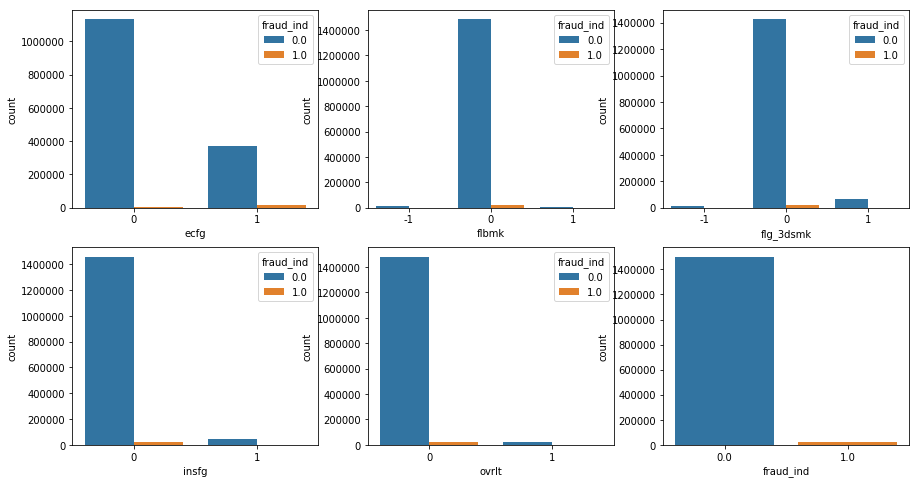

In [13]:
f, axs = plt.subplots(2,3,figsize=(15,8))
plt.subplot(2,3,1)
sns.countplot(data['ecfg'], hue=data['fraud_ind'])
plt.subplot(2,3,2)
sns.countplot(data['flbmk'], hue=data['fraud_ind'])
plt.subplot(2,3,3)
sns.countplot(data['flg_3dsmk'], hue=data['fraud_ind'])
plt.subplot(2,3,4)
sns.countplot(data['insfg'], hue=data['fraud_ind'])
plt.subplot(2,3,5)
sns.countplot(data['ovrlt'], hue=data['fraud_ind'])
plt.subplot(2,3,6)
sns.countplot(data['fraud_ind'])
display(train[["ecfg", "fraud_ind"]].groupby(['ecfg'], as_index=False).mean().round(3))
display(train[["flbmk", "fraud_ind"]].groupby(['flbmk']).mean().round(3))
display(train[["flg_3dsmk", "fraud_ind"]].groupby(['flg_3dsmk']).mean().round(3))
display(train[["insfg", "fraud_ind"]].groupby(['insfg'], as_index=False).mean().round(3))
display(train[["ovrlt", "fraud_ind"]].groupby(['ovrlt'], as_index=False).mean().round(3))
# display(train[["flbmk", "fraud_ind"]].groupby(['flbmk'], as_index=False).mean().round(3))

,contp,fraud_ind
0,0,0.000
1,1,0.000
2,2,0.000
3,3,0.007
4,4,0.011
5,5,0.014
6,6,0.000


,etymd,fraud_ind
0,0,0.001
1,1,0.002
2,2,0.021
3,3,0.007
4,4,0.001
5,5,0.001
6,6,0.073
7,7,0.294
8,8,0.047
9,9,0.006


,stscd,fraud_ind
0,0,0.010
1,1,0.061
2,2,0.305
3,3,0.000
4,4,0.000


,iterm,fraud_ind
0,0,0.014
1,1,0.000
2,2,0.002
3,3,0.000
4,4,0.000
5,5,0.000
6,6,0.000
7,7,0.000
8,8,0.000


,hcefg,fraud_ind
0,0,0.000
1,1,0.001
2,2,0.000
3,3,0.000
4,5,0.014
5,6,0.015
6,7,0.002
7,8,0.000
8,9,0.000


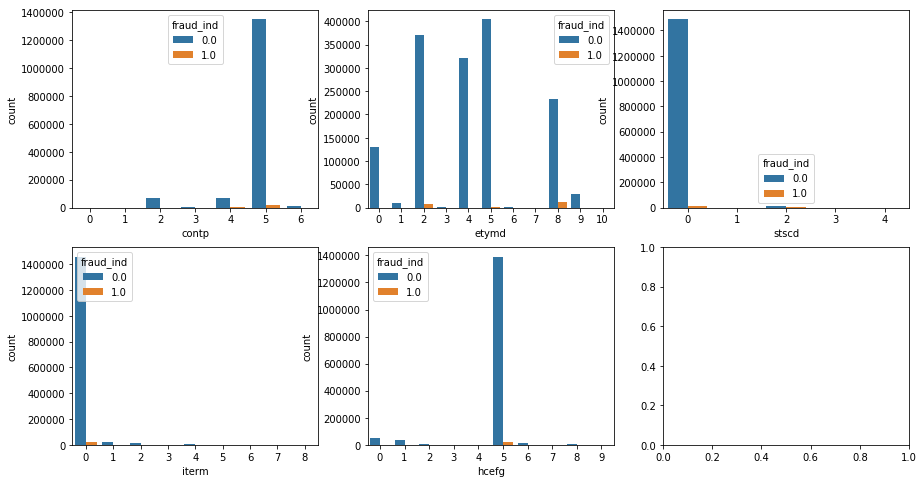

In [18]:
f, axs = plt.subplots(2,3,figsize=(15,8))
plt.subplot(2,3,1)
sns.countplot(data['contp'], hue=data['fraud_ind'])
plt.subplot(2,3,2)
sns.countplot(data['etymd'], hue=data['fraud_ind'])
plt.subplot(2,3,3)
sns.countplot(data['stscd'], hue=data['fraud_ind'])
plt.subplot(2,3,4)
sns.countplot(data['iterm'], hue=data['fraud_ind'])
plt.subplot(2,3,5)
sns.countplot(data['hcefg'], hue=data['fraud_ind'])

display(train[["contp", "fraud_ind"]].groupby(['contp'], as_index=False).mean().round(3))
display(train[["etymd", "fraud_ind"]].groupby(['etymd'], as_index=False).mean().round(3))
display(train[["stscd", "fraud_ind"]].groupby(['stscd'], as_index=False).mean().round(3))
display(train[["iterm", "fraud_ind"]].groupby(['iterm'], as_index=False).mean().round(3))
display(train[["hcefg", "fraud_ind"]].groupby(['hcefg'], as_index=False).mean().round(3))

# Conam

In [20]:
print(train["conam"].describe())
print(test["conam"].describe())

count    1.521787e+06
mean     6.547219e+02
std      4.028078e+02
min      0.000000e+00
25%      4.370600e+02
50%      5.919000e+02
75%      8.073400e+02
max      7.208770e+03
Name: conam, dtype: float64
count    421665.000000
mean        640.413496
std         404.498686
min           0.000000
25%         408.510000
50%         571.030000
75%         791.170000
max        6728.970000
Name: conam, dtype: float64


<function matplotlib.pyplot.show(*args, **kw)>

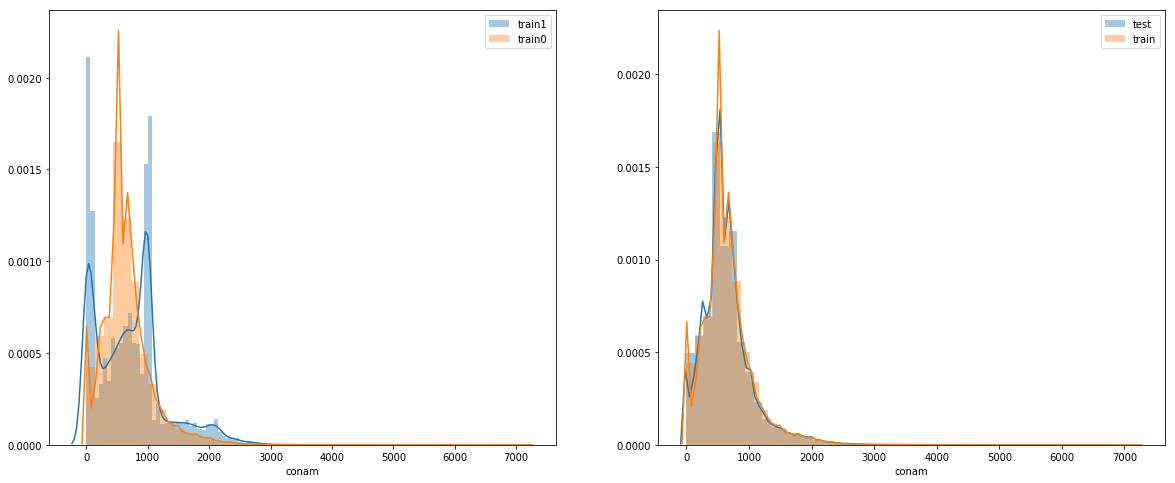

In [21]:
f, axs = plt.subplots(1,2,figsize=(20,8))
plt.subplot(1,2,1)
sns.distplot(train[train['fraud_ind']==1]['conam'],label ='train1' )
sns.distplot(train[train['fraud_ind']==0]['conam'],label ='train0' )
plt.legend()
plt.show
plt.subplot(1,2,2)
sns.distplot(test['conam'],label ='test' )
sns.distplot(train['conam'],label ='train' )
plt.legend()
plt.show

## Skewness

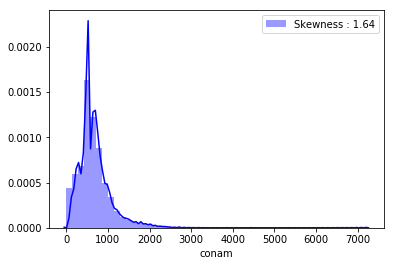

In [26]:
g = sns.distplot(train["conam"], color="b", label="Skewness : %.2f"%(train["conam"].skew()))
g = g.legend(loc="best")

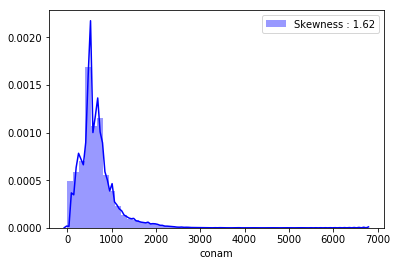

In [27]:
g = sns.distplot(test["conam"], color="b", label="Skewness : %.2f"%(test["conam"].skew()))
g = g.legend(loc="best")

# Day of the Week

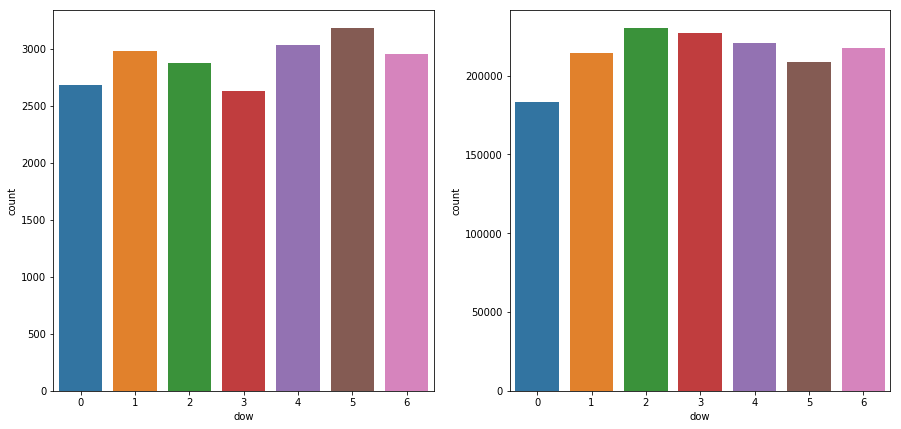

In [10]:
f, axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(1,2,1)
sns.countplot(train[train['fraud_ind']==1]['dow'])
plt.subplot(1,2,2)
sns.countplot(train[train['fraud_ind']==0]['dow'])

# Hour of the day

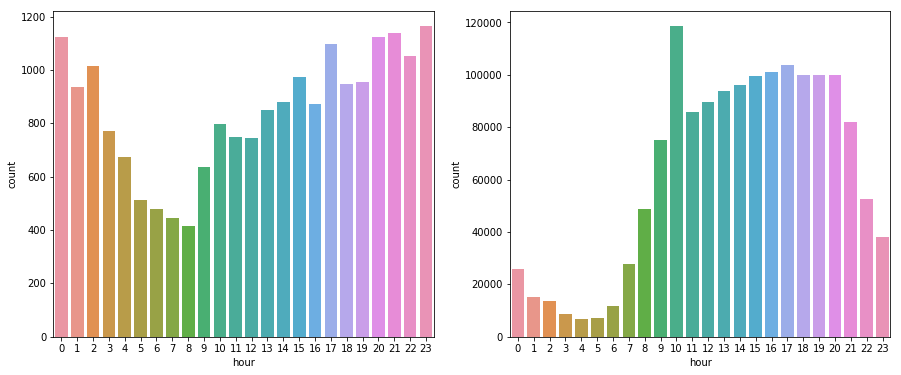

In [47]:
f, axs = plt.subplots(1,2,figsize=(15,6))
plt.subplot(1,2,1)
sns.countplot(train[train['fraud_ind']==1]['hour'])
plt.subplot(1,2,2)
sns.countplot(train[train['fraud_ind']==0]['hour'])

# day of the month

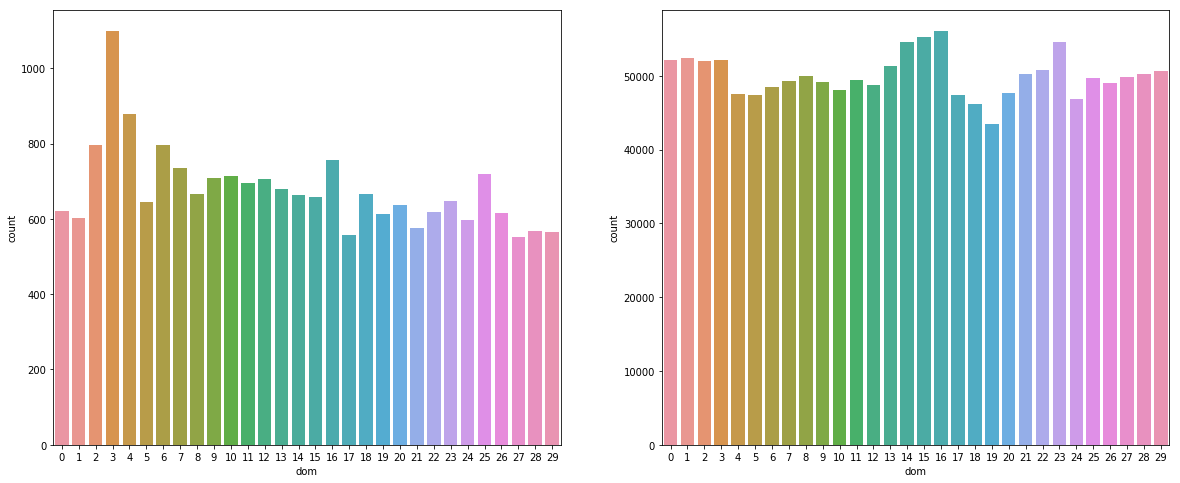

In [17]:
f, axs = plt.subplots(1,2,figsize=(20,8))
plt.subplot(1,2,1)
sns.countplot(train[train['fraud_ind']==1]['dom'])
plt.subplot(1,2,2)
sns.countplot(train[train['fraud_ind']==0]['dom'])

# In Taiwan vs Outside Taiwan

In [53]:
print(train[train["stocn"]!=102]["fraud_ind"].value_counts()/train[train["stocn"]!=102].shape[0]),
print(train[train["stocn"]==102]["fraud_ind"].value_counts()/train[train["stocn"]==102].shape[0])

0    0.908263
1    0.091737
Name: fraud_ind, dtype: float64
0    0.999052
1    0.000948
Name: fraud_ind, dtype: float64


# Correlation 

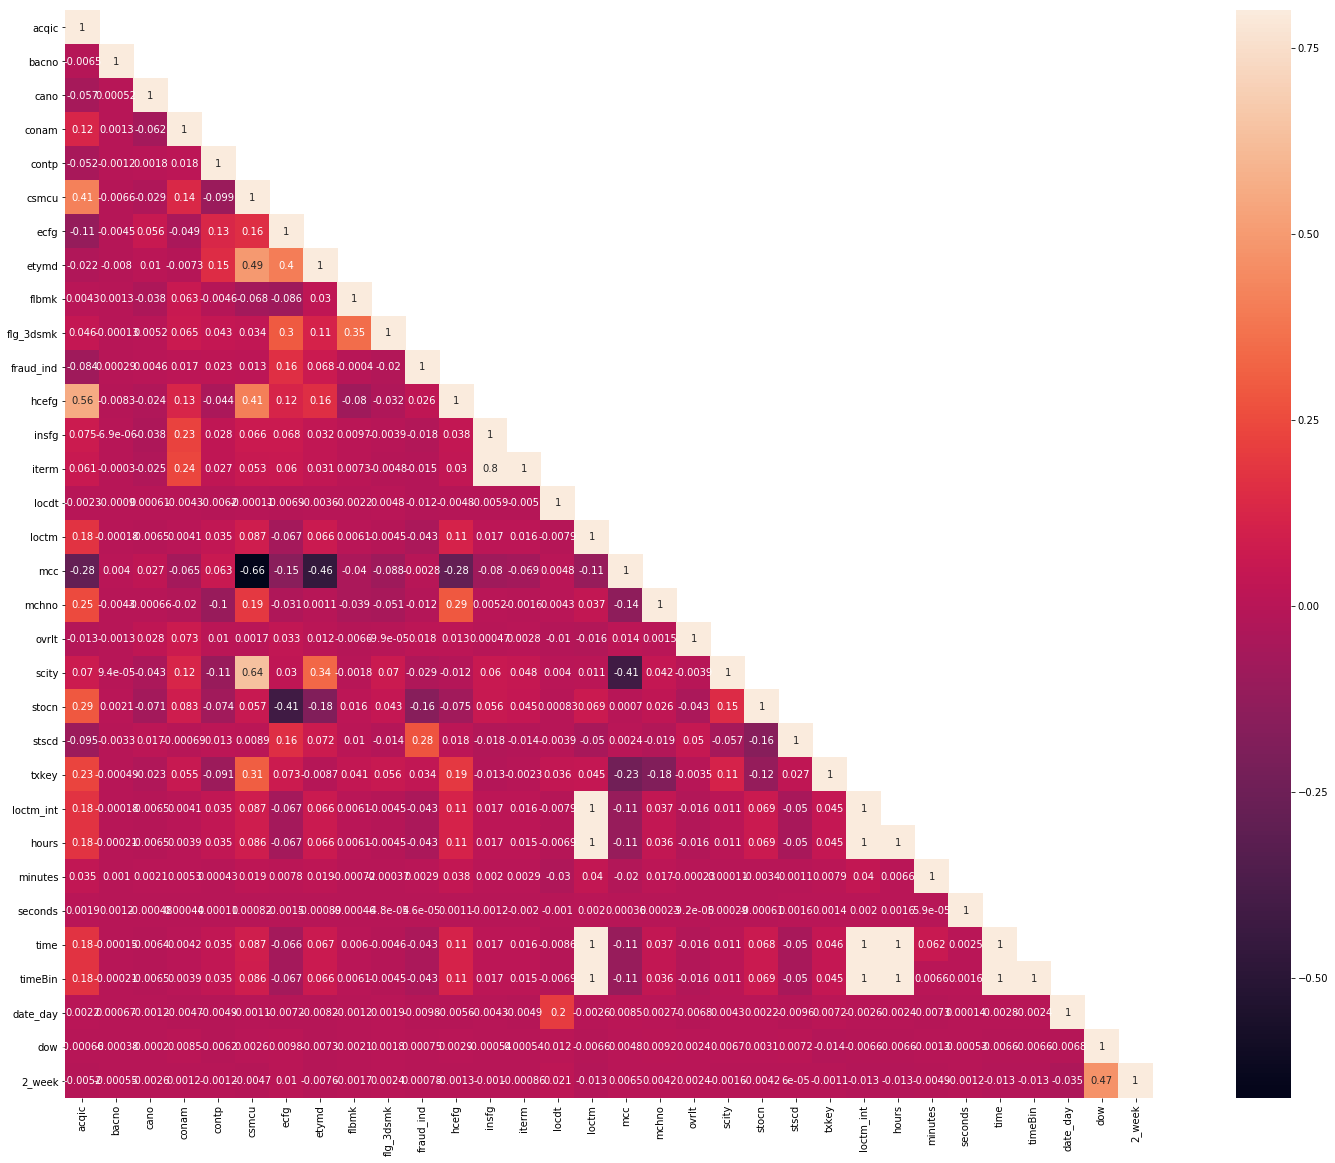

In [16]:
corrMat = data.corr()
mask = np.array(corrMat)
mask[np.tril_indices_from(mask)] = False
plt.subplots(figsize=(30,20))
plt.xticks(rotation=90)#設置刻度標籤角度
sns.heatmap(corrMat, mask=mask,vmax=.8, square=True,annot=True)

In [87]:
data.corr().abs().sort_values(by=['fraud_ind'],ascending = False)[['fraud_ind']]

,fraud_ind
fraud_ind,1.000000
stscd,0.279225
ecfg,0.161701
stocn,0.161405
acqic,0.083764
etymd,0.067743
hour,0.042807
timeBin,0.042807
loctm,0.042688
loctm_int,0.042688
